In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Have to predict Income(Label) with given list of features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country and Income are Object type data which needs to change to Int

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no Null Values present in the database hence we can move a head

In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Data looks fine to encode into Int

In [7]:
print(df['Workclass'].value_counts())
print(df['Occupation'].value_counts())
print(df['Native_country'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                    

The data has Null values in the form of '?' hence needs to fill those NaN

In [8]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

Filling NaN with Mode method since the datatype is Object

In [9]:
df['Workclass'] = df['Workclass'].replace(0.0,4.0)
df['Occupation'] = df['Occupation'].replace(0.0,10.0)
df['Native_country'] = df['Native_country'].replace(0.0,39.0)

In [10]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,4.094349,1.897818e+05,10.298249,10.080590,2.611794,7.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,37.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,1.000000,1.228500e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [11]:
x = df.drop(['Income'],axis=1)
y = df['Income']

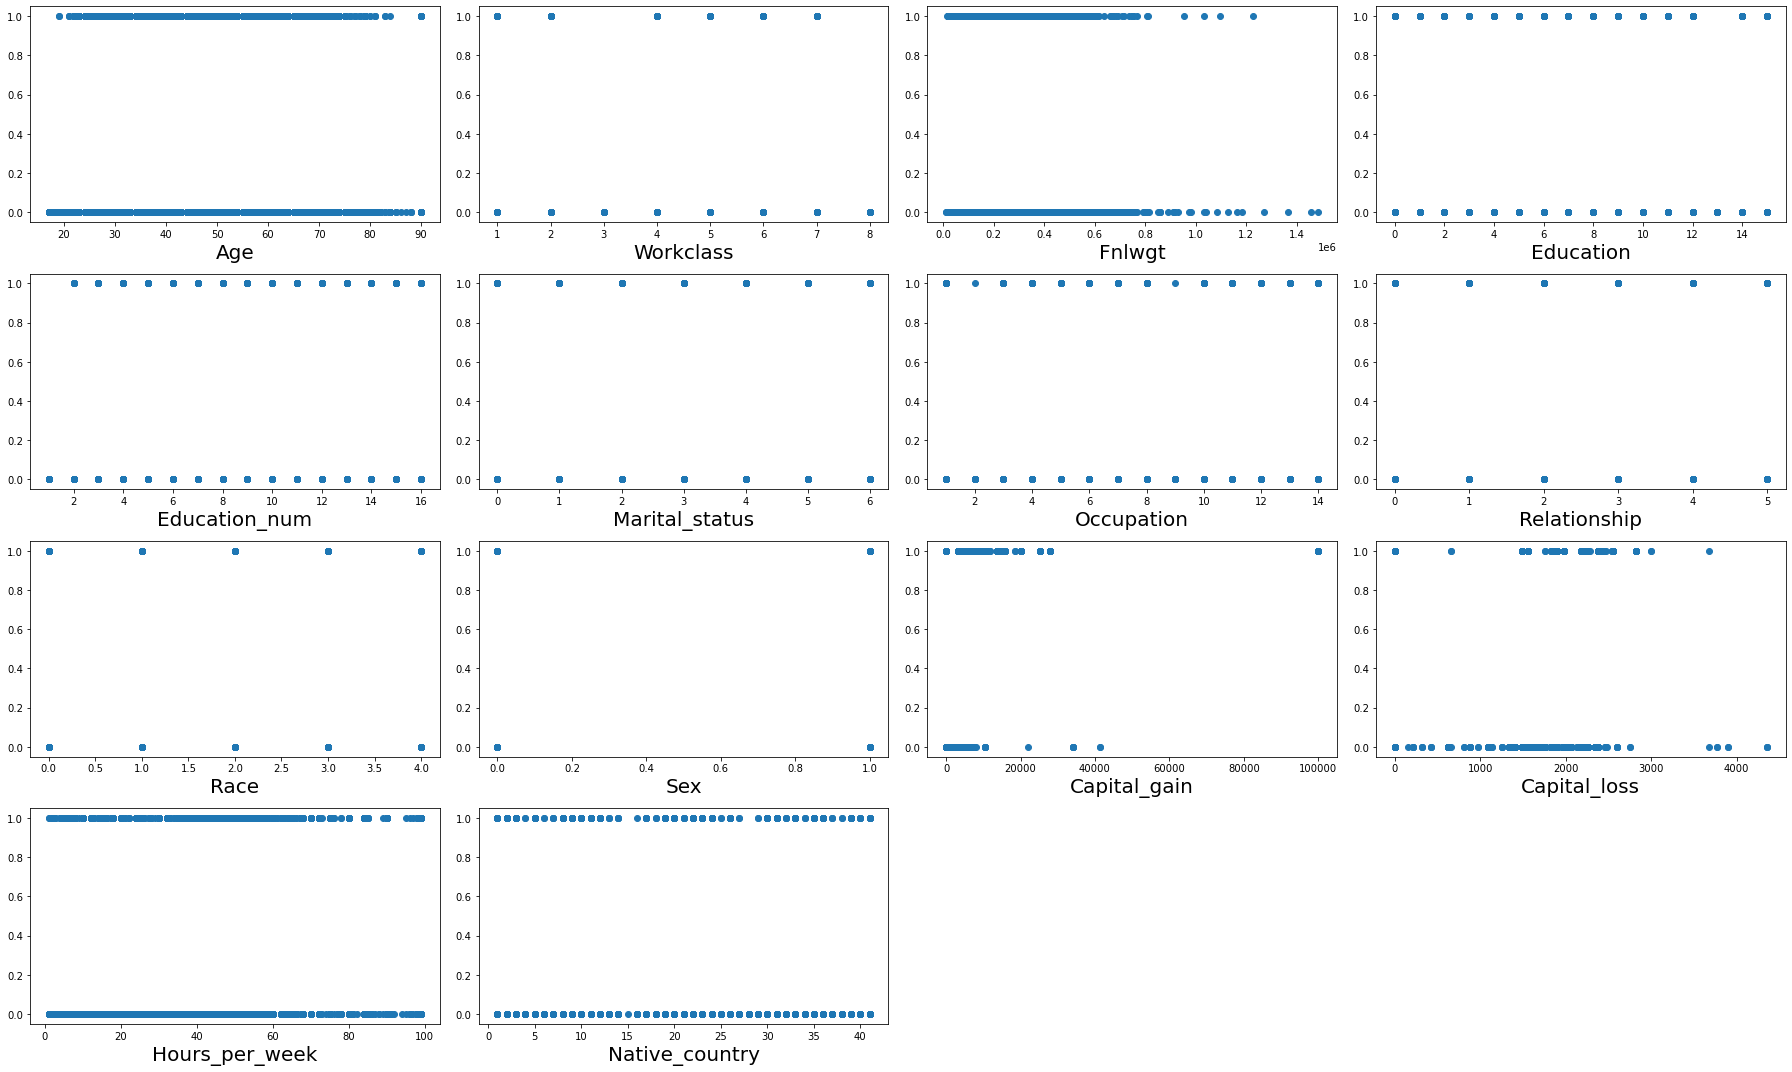

In [12]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 16:
        ax = plt.subplot(4,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Age, Fnlwgt, Education, Capital_gain, Capital_loss and Hours_per_week has a good relationship with Income 

In [13]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

Fnlwgt, Education, Relationship, Race, Sex, Capital_gain, Capital_loss and Native_country has skewness

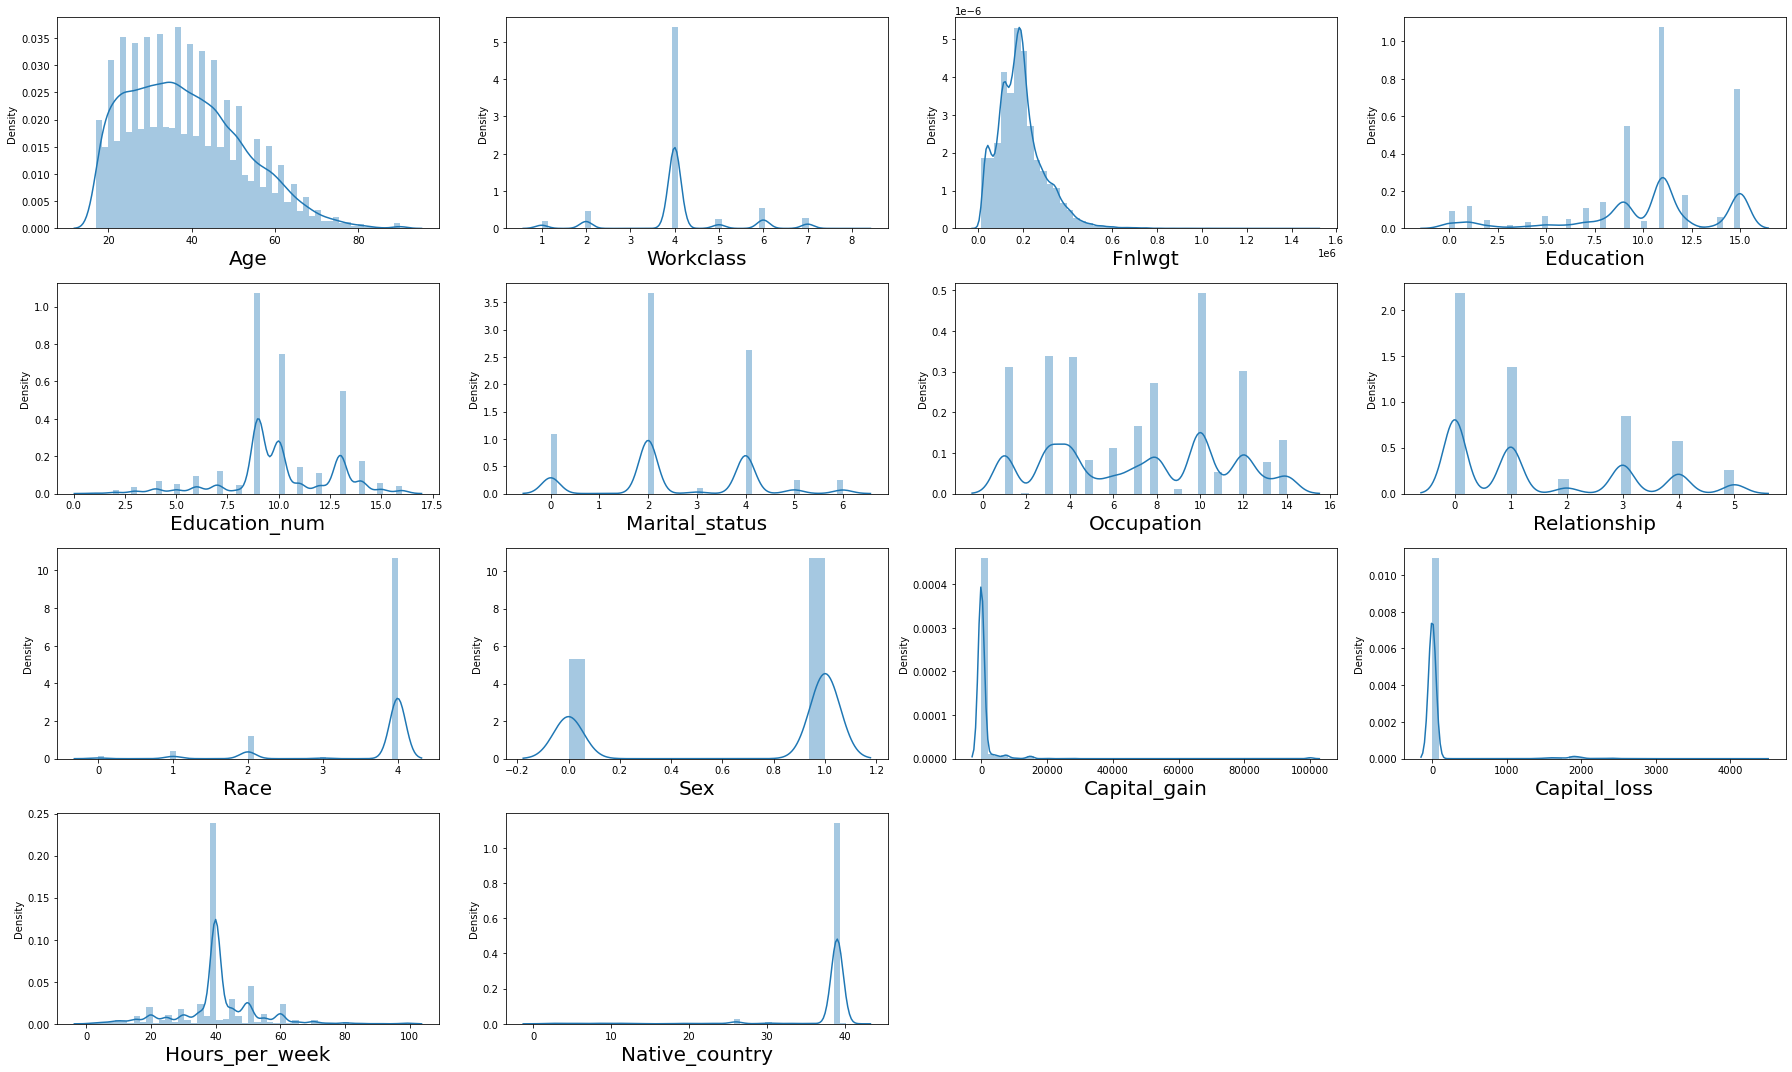

In [14]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 16:
        ax = plt.subplot(4,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

- Fnlwgt, Education, Relationship, Race, Sex, Capital_gain, Capital_loss and Native_country has skewness and can have outliers 
- Education, Relationship, Race, Sex and Native_country are the classified columns hence can not remove the outliers 

In [15]:
df.drop('Income',axis=1).corrwith(df.Income)

Age               0.234039
Workclass         0.002739
Fnlwgt           -0.009481
Education         0.079311
Education_num     0.335182
Marital_status   -0.199295
Occupation        0.034599
Relationship     -0.250924
Race              0.071853
Sex               0.215995
Capital_gain      0.223333
Capital_loss      0.150523
Hours_per_week    0.229690
Native_country    0.023063
dtype: float64

Workclass, Education, Occupation, Race and Native_country have less or no corelation with label

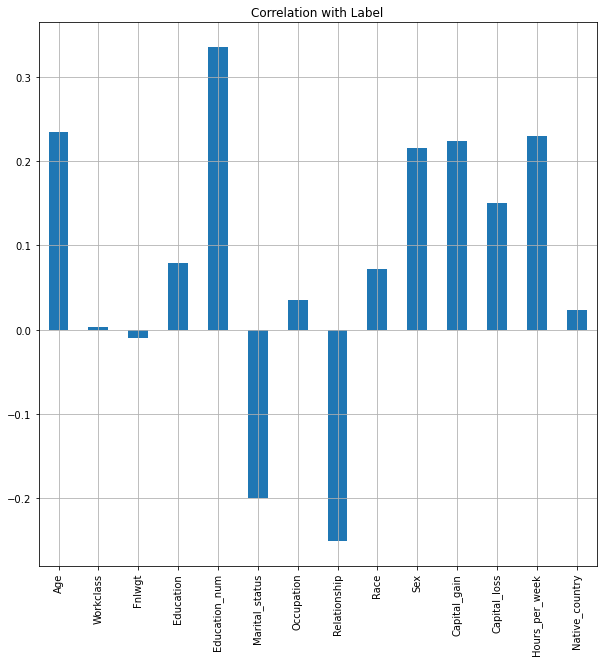

In [16]:
df.drop('Income',axis=1).corrwith(df.Income).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

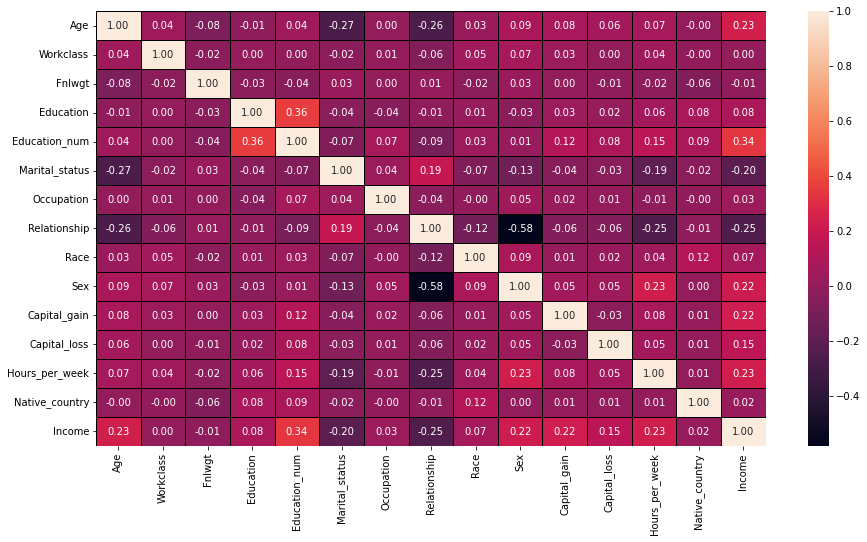

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [18]:
df = df.drop(['Workclass', 'Occupation', 'Native_country'],axis=1)

Deleting Workclass, Occupation, and Native_country since it has No corelation with label

Multicollinearity problem does not exist in this database

In [19]:
df.columns

Index(['Age', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Income'],
      dtype='object')

In [20]:
x = df[['Age', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week']]

In [21]:
vif = pd.DataFrame()
vif["Features"] = x.columns

In [22]:
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [23]:
vif

,Features,VIF
0,Age,8.107316
1,Fnlwgt,4.007132
2,Education,9.050872
3,Education_num,17.325276
4,Marital_status,3.869540
5,Relationship,2.506080
6,Race,15.083497
7,Sex,4.334902
8,Capital_gain,1.043199
9,Capital_loss,1.061353


- Race and Education_num has the highest VIF

In [24]:
df = df.drop(['Race'],axis=1)

- Removed Race column since it has Highest VIF score and low co-relation with Label

In [25]:
df.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,9.0,13,2.0,0.0,1.0,0,0,13,0.0
1,38,215646,11.0,9,0.0,1.0,1.0,0,0,40,0.0
2,53,234721,1.0,7,2.0,0.0,1.0,0,0,40,0.0
3,28,338409,9.0,13,2.0,5.0,0.0,0,0,40,0.0
4,37,284582,12.0,14,2.0,5.0,0.0,0,0,40,0.0


In [26]:
df.describe()

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.298249,10.080590,2.611794,1.446376,0.669195,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,3.870317,2.572709,1.506225,1.606794,0.470510,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,11.000000,10.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,12.000000,4.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,15.000000,16.000000,6.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


Database is ready to remove outliers if exist 

In [27]:
x = df.drop(['Income'],axis=1)
y = df['Income']

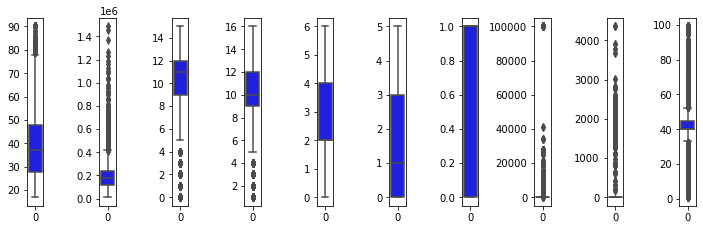

In [28]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

- Outliers are present in Age, Fnlwgt, Education, Education_num, Hours_per_week, Capital_loss and Capital_gain
- Education and Education_num are classified columns hence not removing outliers 
- As per the Observation Capital_loss and Capital_gain has so many outliers but those are not actually the outliers since it is possible that some percentage of people are making huge profits or losses hence not removing outliers

In [29]:
old_data = (df.shape)[0]

In [30]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['Age'] > (q3+1.5*iqr))
lower = np.where(df['Age'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from Age column

In [31]:
q1 = df['Fnlwgt'].quantile(0.25)
q3 = df['Fnlwgt'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['Fnlwgt'] > (q3+1.5*iqr))
lower = np.where(df['Fnlwgt'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from Fnlwgt column

In [32]:
q1 = df['Hours_per_week'].quantile(0.25)
q3 = df['Hours_per_week'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['Hours_per_week'] > (q3+1.5*iqr))
lower = np.where(df['Hours_per_week'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from Hours_per_week column

In [33]:
new_data = (df.shape)[0]

In [34]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 9804 no. of Data


In [35]:
x = df.drop(['Income'],axis=1)
y = df['Income']

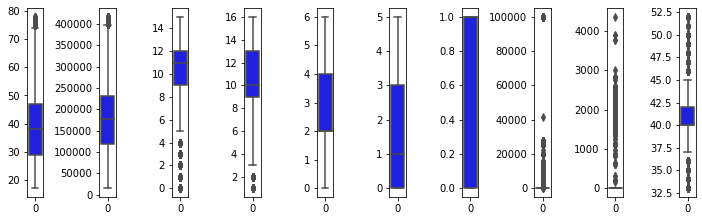

In [36]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed Outliers that are not allowed above and below the specified limit

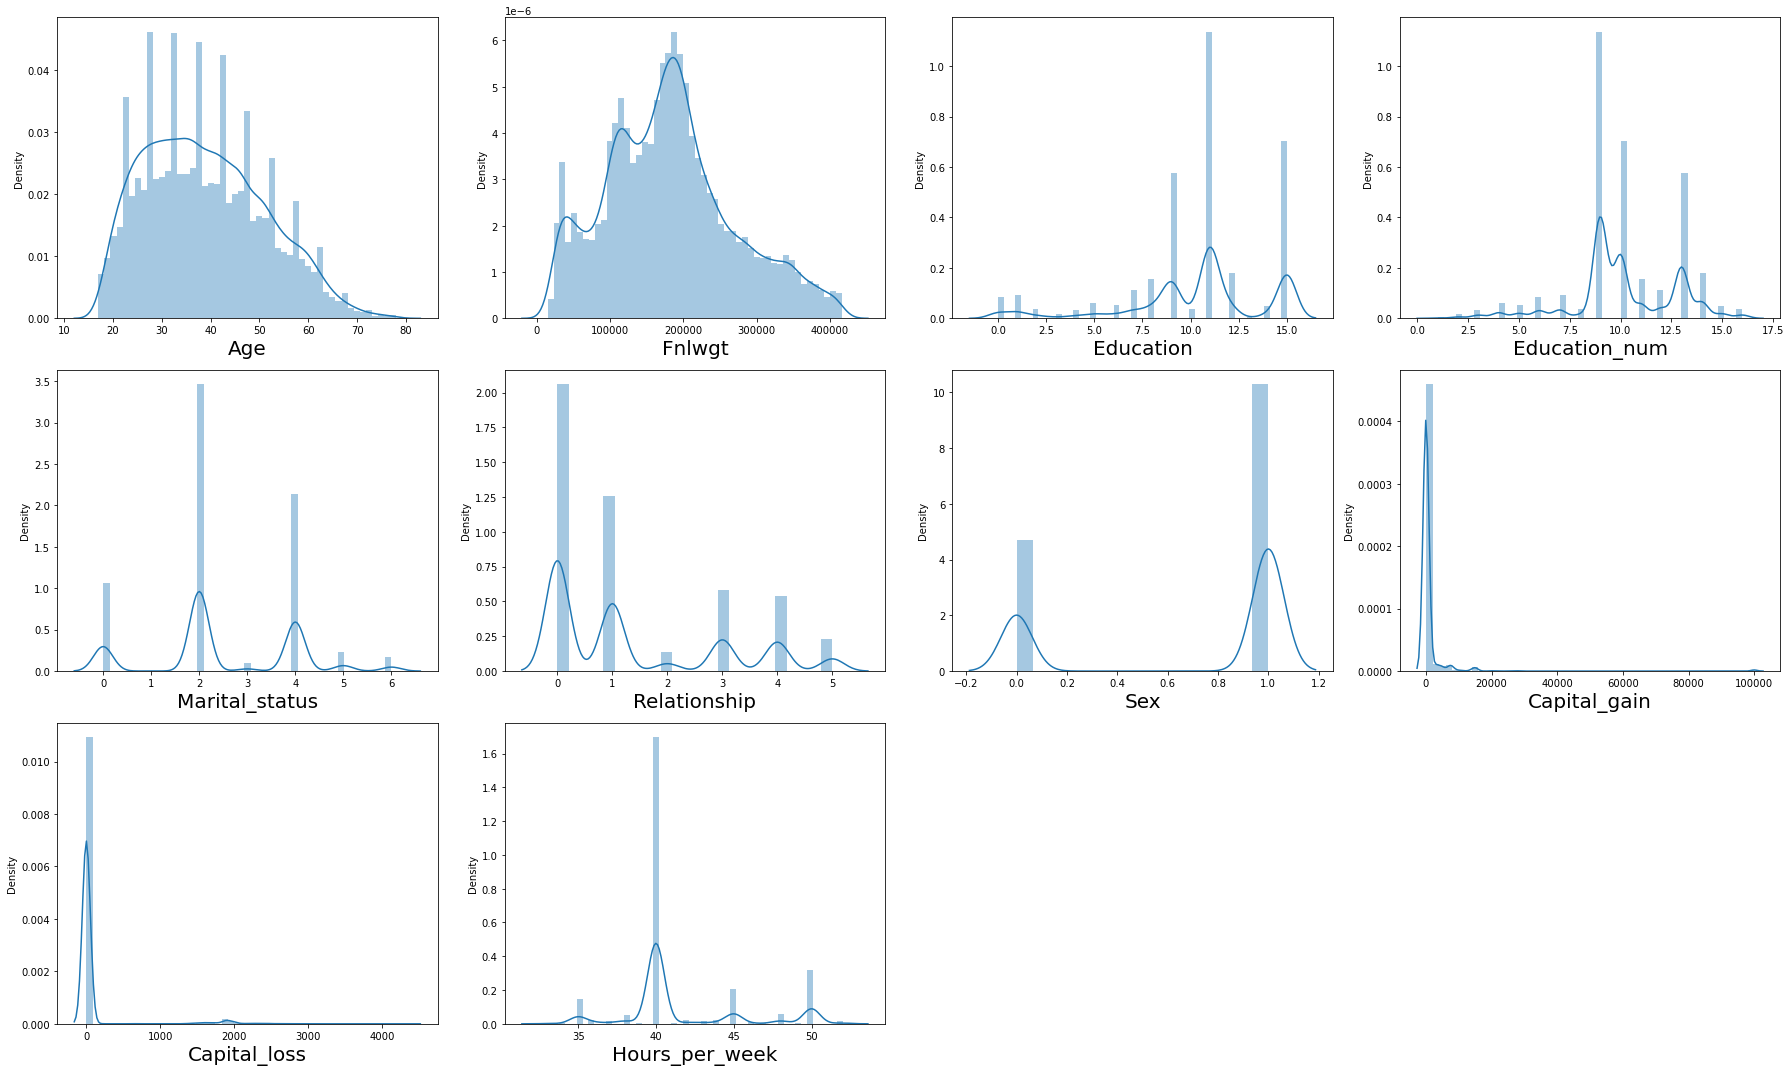

In [37]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [38]:
scaler = PowerTransformer(method='yeo-johnson')

In [39]:
df[['Age','Fnlwgt','Hours_per_week','Capital_loss','Capital_gain']] = scaler.fit_transform(df[['Age','Fnlwgt','Hours_per_week','Capital_loss','Capital_gain']].values)

In [40]:
x = df.drop(['Income'],axis=1)
y = df['Income']

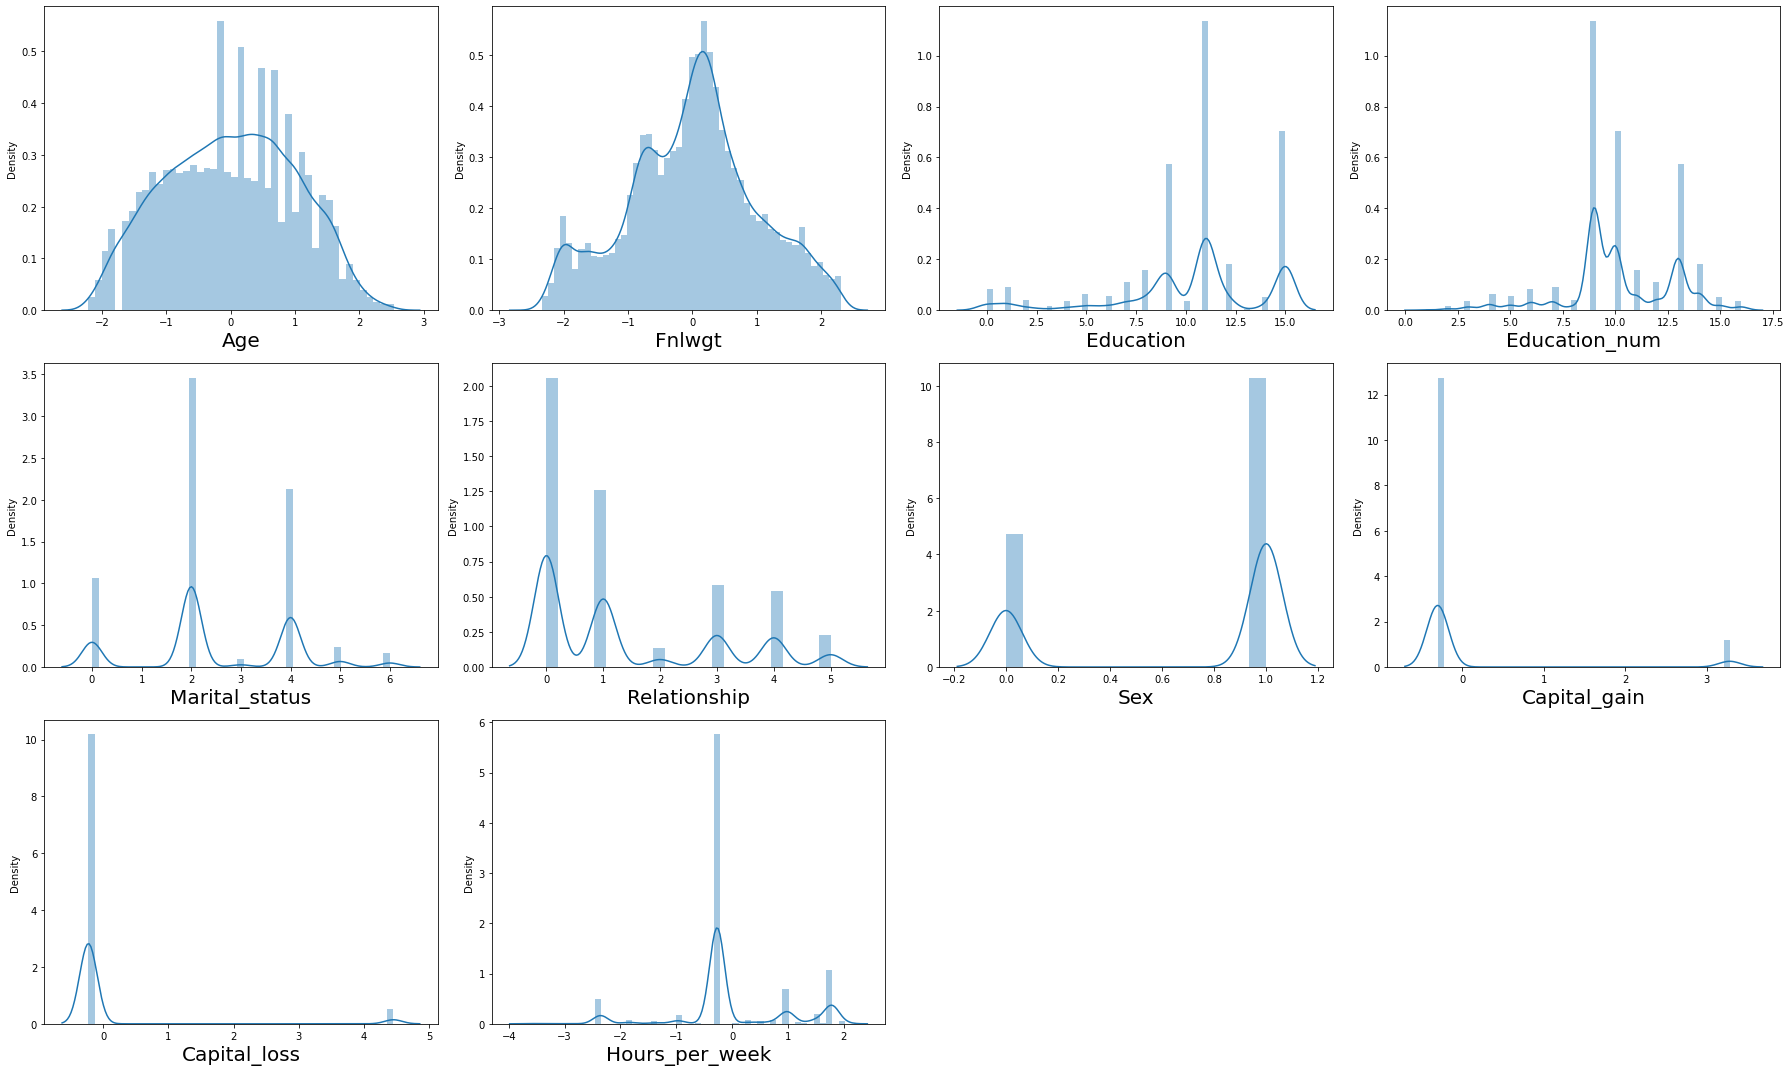

In [41]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [42]:
x = df.drop(['Income'],axis=1)
y = df['Income']

In [43]:
df['Income'].value_counts()

0.0    16928
1.0     5828
Name: Income, dtype: int64

There is a imbalance between Label hence have applied OverSampling method to balance the dataset

In [44]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.01,random_state = 65)

Have added test_size small so that we can not loose train data

In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [47]:
ove_smp=SMOTE(0.75)

x_train_new, y_train_new = ove_smp.fit_sample(x_train, y_train)

In [48]:
print (y_train.value_counts())
print (y_train_new.value_counts())

0.0    16752
1.0     5776
Name: Income, dtype: int64
0.0    16752
1.0    12564
Name: Income, dtype: int64


Now the data is balanced

In [49]:
X_scale = x_train_new
y = y_train_new

Scaled the Data

# Model Buidling

# LogisticRegression

In [50]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.7545367717287488 Random_state 1
max_accuracy 0.7545367717287488 max_Random_state 1
accuracy 0.7628598717423932 Random_state 2
max_accuracy 0.7628598717423932 max_Random_state 2
accuracy 0.760676763542093 Random_state 3
accuracy 0.7624505389548369 Random_state 4
accuracy 0.7548096602537864 Random_state 5
accuracy 0.7687269750307 Random_state 6
max_accuracy 0.7687269750307 max_Random_state 6
accuracy 0.7591758766543867 Random_state 7
accuracy 0.7677718651930686 Random_state 8
accuracy 0.7659980897803247 Random_state 9
accuracy 0.7672260881429935 Random_state 10
accuracy 0.7508527766407422 Random_state 11
accuracy 0.756719879929049 Random_state 12
accuracy 0.7586300996043116 Random_state 13
accuracy 0.7623140946923181 Random_state 14
accuracy 0.7576749897666804 Random_state 15
accuracy 0.7599945422294992 Random_state 16
accuracy 0.7531723291035612 Random_state 17
accuracy 0.7639514258425433 Random_state 18
accuracy 0.766407422567881 Random_state 19
accuracy 0.7640878701050621 R

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 177)

In [80]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [81]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 75.97%

===============Test Result===============
Accuracy Score: 77.58%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      4199
         1.0       0.75      0.71      0.73      3130

    accuracy                           0.78      7329
   macro avg       0.77      0.77      0.77      7329
weighted avg       0.77      0.78      0.77      7329

Cross Validation Score-  0.7616660508160524


# RandomForestClassifier

In [82]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.94%

===============Test Result===============
Accuracy Score: 85.51%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      4199
         1.0       0.82      0.84      0.83      3130

    accuracy                           0.86      7329
   macro avg       0.85      0.85      0.85      7329
weighted avg       0.86      0.86      0.86      7329

Cross Validation Score-  0.8550975328202227


# DecisionTreeClassifier

In [83]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.94%

===============Test Result===============
Accuracy Score: 81.96%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      4199
         1.0       0.79      0.79      0.79      3130

    accuracy                           0.82      7329
   macro avg       0.82      0.82      0.82      7329
weighted avg       0.82      0.82      0.82      7329

Cross Validation Score-  0.8117763047520474


# GradientBoostingClassifier

In [84]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 83.45%

===============Test Result===============
Accuracy Score: 83.59%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      4199
         1.0       0.80      0.83      0.81      3130

    accuracy                           0.84      7329
   macro avg       0.83      0.83      0.83      7329
weighted avg       0.84      0.84      0.84      7329

Cross Validation Score-  0.8282512200473802


# Support Vector Classifier

In [85]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 80.72%

===============Test Result===============
Accuracy Score: 80.64%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      4199
         1.0       0.74      0.85      0.79      3130

    accuracy                           0.81      7329
   macro avg       0.80      0.81      0.81      7329
weighted avg       0.81      0.81      0.81      7329

Cross Validation Score-  0.8030769067886826


# KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 87.24%

===============Test Result===============
Accuracy Score: 81.44%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      4199
         1.0       0.75      0.85      0.80      3130

    accuracy                           0.81      7329
   macro avg       0.81      0.82      0.81      7329
weighted avg       0.82      0.81      0.82      7329

Cross Validation Score-  0.8220774126548923


# Findings

- LogisticsRegression - Cross Validation Score is 76.16%, Accuracy Score of Train Result is 75.97% and Test Result is 77.58%
- RandomForestClassifier - Cross Validation Score is 85.50%, Accuracy Score of Train Result is 99.94% and Test Result is 85.51%
- DecisionTreeClassifier - Cross Validation Score is 81.17%, Accuracy Score of Train Result is 99.94% and Test Result is 81.96%
- GradientBoostingClassifier - Cross Validation Score is 82.82%, Accuracy Score of Train Result is 83.45% and Test Result is 83.59%
- Support Vector Classifier - Cross Validation Score is 80.30%, Accuracy Score of Train Result is 80.72% and Test Result is 80.64%
- KNeighborsClassifier - Cross Validation Score is 82.20%, Accuracy Score of Train Result is 87.24% and Test Result is 81.44%

Choosing GradientBoostingClassifier as it has low variance between train and test result and has high accuracy

# Hyper Parameter Tuning

In [67]:
grid_param = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': np.arange(0.1,0.9,0.1),
    'criterion':['friedman_mse', 'mse', 'mae'],
}

Selecting Parameters for Hyper Parameter Tuning

In [68]:
grid_search = GridSearchCV(estimator=gbdt,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

Searching the best grid for the model

In [69]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  learning_rate=0.5),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                         'loss': ['deviance', 'exponential']})

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [70]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'friedman_mse', 'learning_rate': 0.8, 'loss': 'deviance'}


In [74]:
gbdt = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.8, loss='deviance')
gbdt.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.8)

Applying best parameters to train the model

In [75]:
y_pred = gbdt.predict(x_test)
pred = gbdt.predict(x_train)

In [76]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Train Accuracy Score: 88.67%
Test Accuracy Score: 86.97%
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      4227
         1.0       0.86      0.83      0.84      3102

    accuracy                           0.87      7329
   macro avg       0.87      0.86      0.87      7329
weighted avg       0.87      0.87      0.87      7329



- Previous Accuracy Score for Support Vector Classifier - 83.59% 
- New Accuracy Score for Support Vector Classifier - 86.97% 

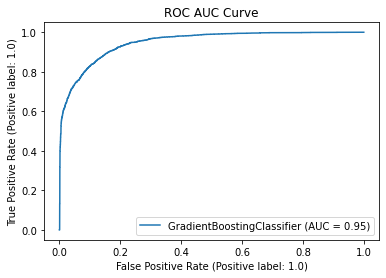

In [77]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbdt,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

###### Accuracy score of GradientBoostingClassifier after Tuning the model is 86.97% and AUC score is 95% which is pretty good

In [87]:
file = 'Census_Income_Project.pickle'
pickle.dump(gbdt, open(file, 'wb'))